In [1]:
import os 
import sys
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import lognorm
from scipy.stats import norm 
from scipy import integrate
from scipy.stats import gmean

from scipy.stats import pearsonr

import statsmodels.api as sm 
import statsmodels.formula.api as smf

### src; https://github.com/arkottke/pyrotd
import pyrotd



%load_ext autoreload
%autoreload 2

/Users/laxmandahal/opt/miniconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
with open('BuildingNames.txt', 'r') as f:
    BuildingList = f.read() 
BuildingList = BuildingList.split('\n')
IM_list = ['SaT1', 'PGA', 'PGV', 'Sa_avg', 'CAV', 'SI', 'ASI', 'DSI','DS_5to75', 'DS_5to95' ]


baseDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/IM_study'

## time period of the buildings
# T = np.array([0.13, 0.12, 0.22, 0.22, 0.16, 0.15, 0.26, 0.25, 0.49, 0.49])
T = np.array([0.13, 0.12, 0.16, 0.15, 0.22, 0.22, 0.26, 0.25, 0.49, 0.49])

numGM = 826
g = 980.665 ## converts GM record to cm/sec^2


In [3]:
BuildingList

['s1_48x32_high',
 's1_48x32_veryhigh',
 's1_96x48_high',
 's1_96x48_veryhigh',
 's2_48x32_high',
 's2_48x32_veryhigh',
 's2_96x48_high',
 's2_96x48_veryhigh',
 's4_96x48_high',
 's4_96x48_veryhigh']

In [4]:
gminfo_rotD50 = pd.read_csv(r'data/Complete_GM_info_RotD50.csv')
gminfo_rotD50 = gminfo_rotD50.set_index('key_0')
gminfo_rotD50.index.names = ['GMID']

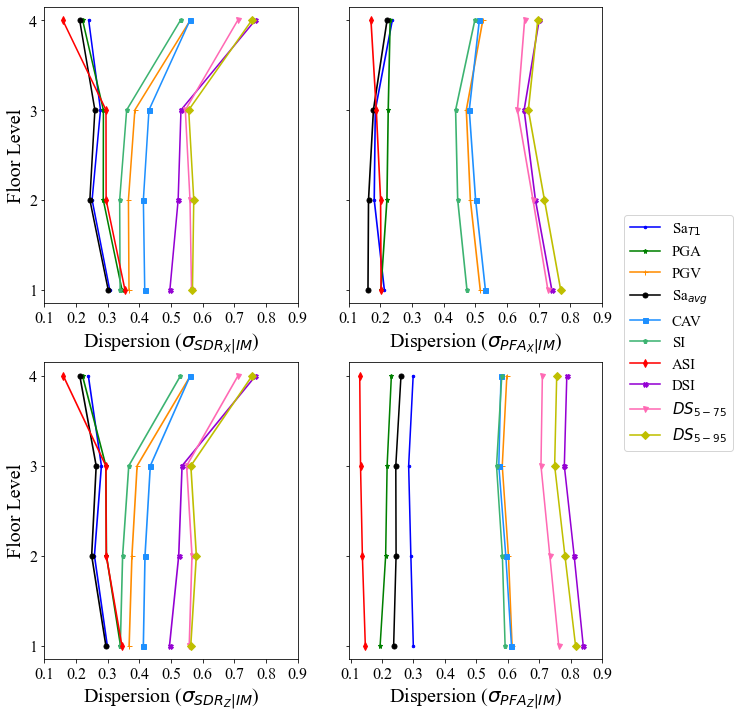

In [9]:
from plotting_utilities import plot_efficiency_OLS, plot_efficiency_OLS_portfolio

plot_efficiency_OLS(baseDir, BuildingList, 9, gminfo_rotD50, IM_list, pairingID=1, average_EDP=True,
               Uni_Direction=False, savefig=True, fileName='efficiency_OLS')

In [10]:
entropy_efficiency = pd.read_csv(os.path.join(baseDir, *['Codes', 'GAM_models',
                                                         'Summary_results',
                                                         'summary_efficiency_GAM_entropy.csv']), index_col=0)


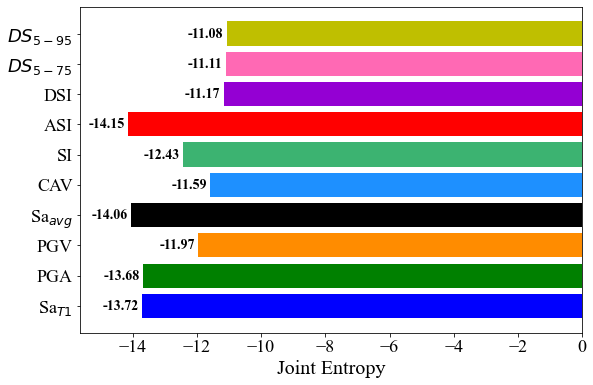

In [33]:
from plotting_utilities import plot_efficiency_entropy, plot_efficiency_entropy_portfolio

plot_efficiency_entropy(baseDir, BuildingList, 9, entropy_efficiency,
                        IM_list, savefig=True, fileName='entropy_efficiency')

In [15]:
from efficiency_OLS import portfolio_mean_efficiency
mean_sdr_ols, mean_pfa_ols = portfolio_mean_efficiency(baseDir, BuildingList, gminfo_rotD50, IM_list,
                                                         pairingID = 1, average_EDP = True, Uni_Direction = False)

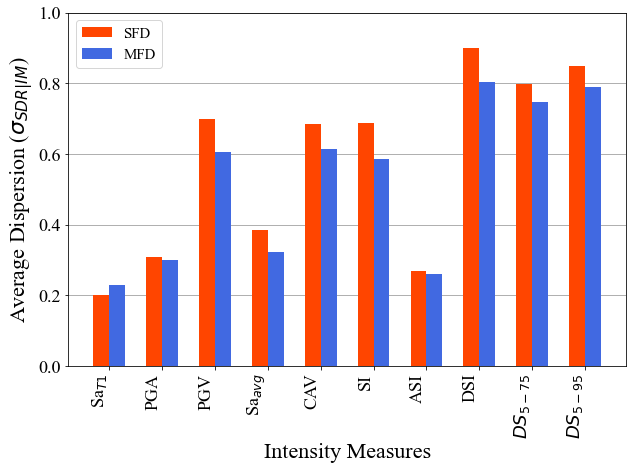

In [57]:
plot_efficiency_OLS_portfolio(baseDir, mean_sdr_ols, IM_list, EDP_type='SDR',
                              savefig=True, fileName='efficiency_OLS_portfolio')

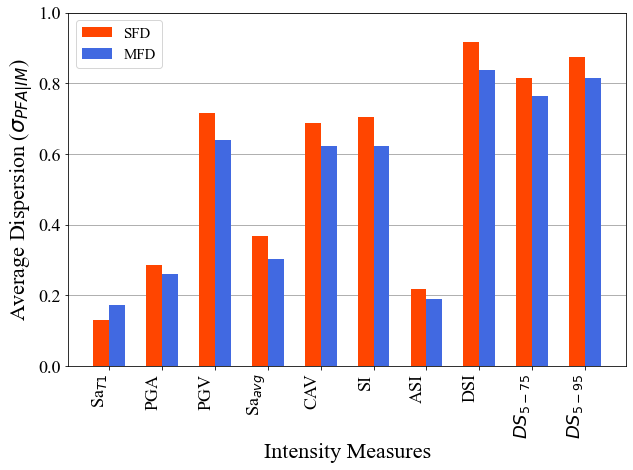

In [58]:
plot_efficiency_OLS_portfolio(baseDir, mean_pfa_ols, IM_list, EDP_type='PFA',
                              savefig=True, fileName='efficiency_OLS_portfolio')

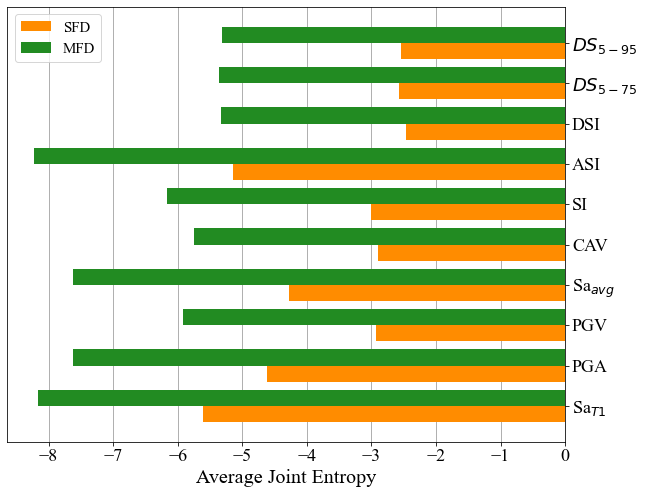

In [56]:
plot_efficiency_entropy_portfolio(baseDir, entropy_efficiency, IM_list, 
                                  savefig=True, fileName = 'entropy_efficiency_portfolio')

In [ ]:
from efficiency_OLS import SummaryResutls_efficiency

tempdf = SummaryResutls_efficiency(baseDir, BuildingList, 9, gminfo_rotD50, IM_list, 
                         pairingID=1, average_EDP=True, rotate_EDP=False)
tempdf

In [ ]:
from utility_functions import save_data_for_R

mfd_6b = save_data_for_R(baseDir, BuildingList, 9, gminfo_rotD50, IM_list, pairingID=1, 
                        average_EDP=False, rotate_EDP=False, save_to_csv=False)
mfd_6b

In [ ]:
mfd_6b.columns

In [ ]:
0.5 * -np.log(1-0.996**2)

In [ ]:
from utility_functions import calc_mutual_information, calc_mutual_information_sklearn

calc_mutual_information(np.log(mfd_6b.story_1_sdrX), np.log(mfd_6b.story_1_pfaX), bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_sdrX), np.log(mfd_6b.story_1_sdrX), bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_sdrX), np.log(mfd_6b.SaT1), bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_sdrX),mfd_6b.Magnitude, bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_sdrX), mfd_6b.Distance_Rjb, bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_pfaX), np.log(mfd_6b.story_1_pfaX), bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_pfaX), np.log(mfd_6b.SaT1), bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_pfaX),mfd_6b.Magnitude, bins=15)

In [ ]:
calc_mutual_information(np.log(mfd_6b.story_1_pfaX), mfd_6b.Distance_Rjb, bins=15)

In [ ]:
calc_mutual_information(mfd_6b.Magnitude, mfd_6b.Magnitude, bins=15)

In [ ]:
calc_mutual_information(mfd_6b.Distance_Rjb, mfd_6b.Distance_Rjb, bins=15)

In [ ]:
calc_mutual_information(mfd_6b.Magnitude, mfd_6b.Distance_Rjb, bins=15)

In [ ]:
from plotting_utilities import plot_mutual_information

a = plot_mutual_information(baseDir, mfd_6b, hide_upper= False, savefig = True, figname='MFD6B')

In [ ]:
a